In [ ]:
# I want to read in a hypnogram and gor contiguous groups of sleep sessions
# first I'll make a column of sleep or no sleep
# then I'll analyze the distribution of no sleep times
# hopefully there's a cutoff that I can run my pose estimation and heart rate analysis from

In [14]:
import os
import sys
def getRepoPath():
    cwd = os.getcwd()
    delimiter = "\\" if "\\" in cwd else "/"
    repoPath = delimiter.join(cwd.split(delimiter)[:cwd.split(delimiter).index("dataImport")]) + delimiter
    return repoPath
repoPath = getRepoPath()
sys.path.append(repoPath + 'dataImport/')
from utils import workingDataPath, getWorkingHypnoDfParquet, regroupHypno
import pandas as pd

appleHypnoDF = getWorkingHypnoDfParquet("apple").drop(["creationDate", "sourceVersion"], axis=1)
appleHypnoDF['startDate'] = appleHypnoDF.index
appleHypnoDF

,endDate,value,startDate
startDate,,,
2022-10-01 00:42:59-07:00,2022-10-01 01:13:59-07:00,1,2022-10-01 00:42:59-07:00
2022-10-01 01:13:59-07:00,2022-10-01 01:29:59-07:00,2,2022-10-01 01:13:59-07:00
2022-10-01 01:29:59-07:00,2022-10-01 01:30:29-07:00,0,2022-10-01 01:29:59-07:00
2022-10-01 01:30:29-07:00,2022-10-01 01:43:29-07:00,1,2022-10-01 01:30:29-07:00
2022-10-01 01:43:29-07:00,2022-10-01 01:50:59-07:00,3,2022-10-01 01:43:29-07:00
...,...,...,...
2024-07-16 07:14:28-07:00,2024-07-16 07:14:58-07:00,0,2024-07-16 07:14:28-07:00
2024-07-16 07:14:58-07:00,2024-07-16 07:34:58-07:00,1,2024-07-16 07:14:58-07:00
2024-07-16 07:34:58-07:00,2024-07-16 07:36:28-07:00,0,2024-07-16 07:34:58-07:00


In [7]:
fitbitHypnoDF = getWorkingHypnoDfParquet("fitbit")
fitbitHypnoDF['startDate'] = fitbitHypnoDF.index
fitbitHypnoDF

/home/chowder/Documents/dataImport/workingData/fitbit/sleep/fitBitHypnoDf.parquet.gzip


,endDate,value
startDate,,
2020-05-13 13:43:00-07:00,2020-05-13 13:45:00-07:00,1
2020-05-13 13:45:00-07:00,2020-05-13 14:41:00-07:00,2
2020-05-13 14:41:00-07:00,2020-05-13 14:42:00-07:00,1
2020-05-13 14:42:00-07:00,2020-05-13 14:43:00-07:00,2
2020-05-13 14:43:00-07:00,2020-05-14 01:21:00-07:00,-1
...,...,...
2024-08-27 12:20:30-07:00,2024-08-27 12:28:30-07:00,2
2024-08-27 12:28:30-07:00,2024-08-27 12:40:30-07:00,1
2024-08-27 12:40:30-07:00,2024-08-27 12:46:30-07:00,2


In [9]:
groupedByNoData = regroupHypno(appleHypnoDF, [-1])
noDataTimes = groupedByNoData[groupedByNoData['value'] == 1]
dataTimes = groupedByNoData[groupedByNoData['value'] == 0]

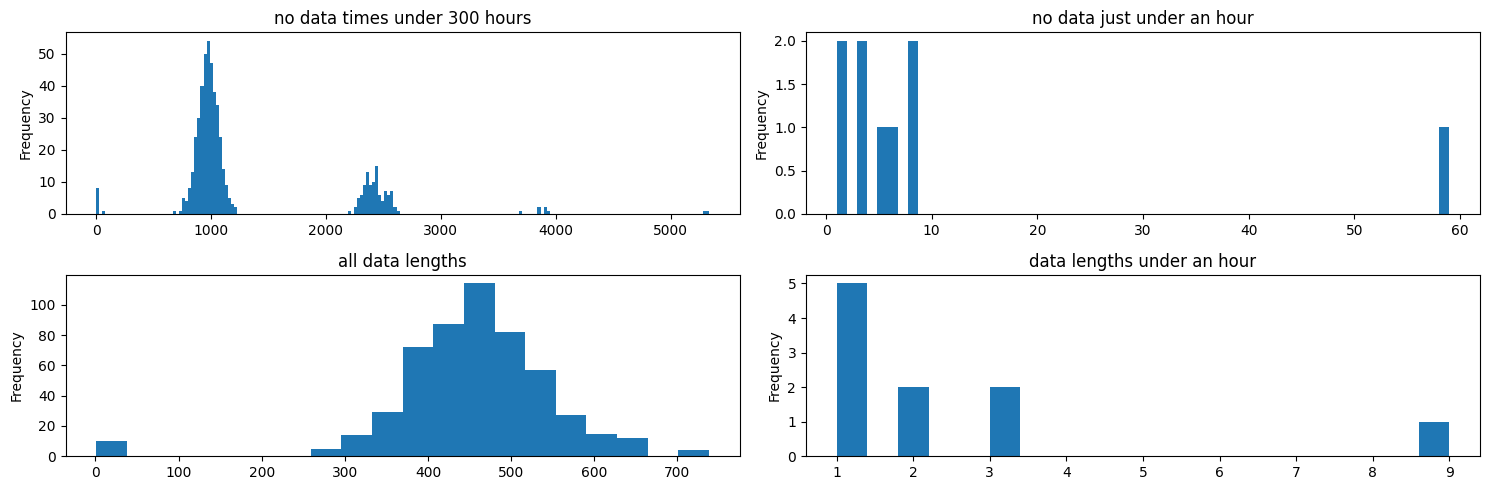

In [10]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(15, 5))

noDataTimes[noDataTimes['durationInMin'] < 18000].durationInMin.plot.hist(bins=200, ax=axs[0,0])
axs[0,0].set_title("no data times under 300 hours")

noDataTimes[noDataTimes['durationInMin'] < 60].durationInMin.plot.hist(bins=60, ax=axs[0,1])
axs[0,1].set_title('no data just under an hour')

dataTimes[dataTimes['durationInMin'] < 10000].durationInMin.plot.hist(bins=20, ax=axs[1,0])
axs[1,0].set_title('all data lengths')

dataTimes[dataTimes['durationInMin'] < 60].durationInMin.plot.hist(bins=20, ax=axs[1,1])
axs[1,1].set_title('data lengths under an hour')

plt.tight_layout()
plt.show()

In [11]:
groupedByAsleep = regroupHypno(appleHypnoDF, [1,2,3])
awakeOrNoDataTimes = groupedByAsleep[groupedByAsleep['value'] == 0]
sleepTimes = groupedByAsleep[groupedByAsleep['value'] == 1]

<AxesSubplot:>

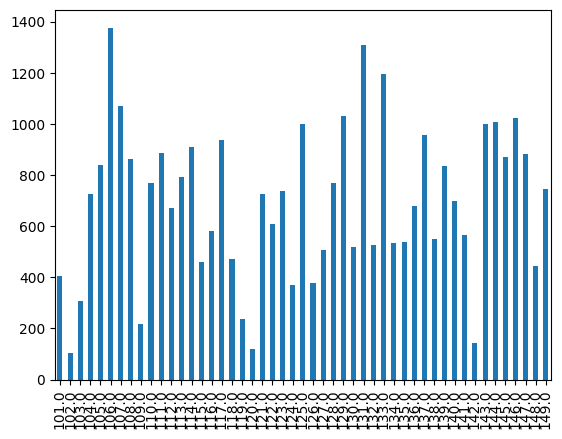

In [15]:
overallDurationList = (sleepTimes.durationInMin.value_counts().index *
                       sleepTimes.durationInMin.value_counts().values
                       ).to_list()
sleepTimesOverallDurations = pd.Series(index=sleepTimes.durationInMin.value_counts().index, 
                                       data=overallDurationList)

sleepTimesOverallDurations = sleepTimesOverallDurations.sort_index()

sleepTimesOverallDurations[(100 < sleepTimesOverallDurations.index) &
                           (sleepTimesOverallDurations.index < 150)].plot.bar()

<AxesSubplot:>

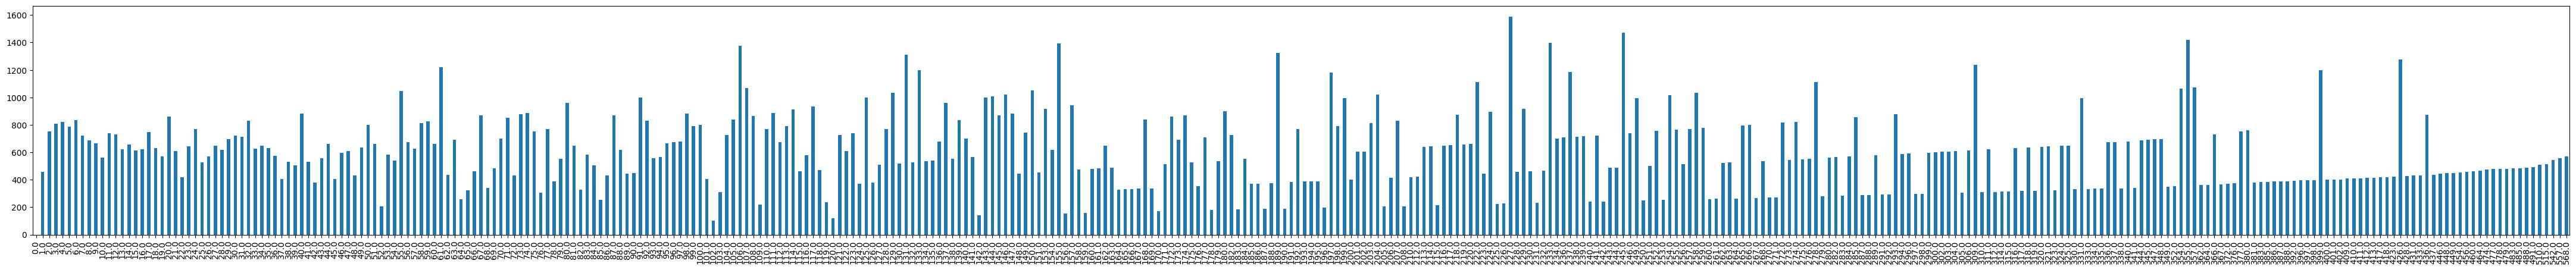

In [18]:
sleepTimesOverallDurations.plot.bar(figsize=(55, 5))

<AxesSubplot:ylabel='Frequency'>

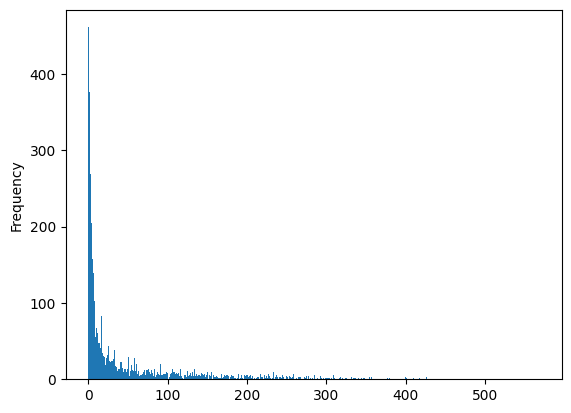

In [170]:
sleepTimes.durationInMin.plot.hist(bins=500)

<AxesSubplot:ylabel='Frequency'>

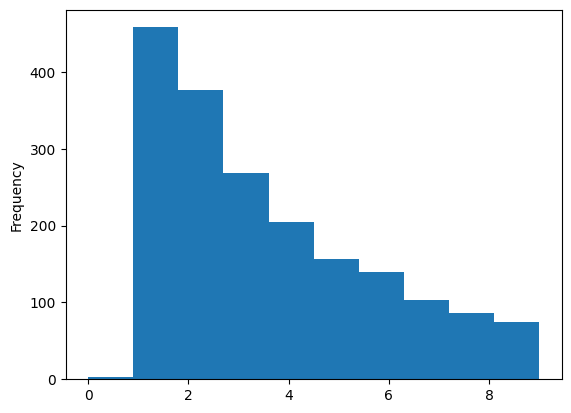

In [134]:
sleepTimes[sleepTimes['durationInMin'] < 10].durationInMin.plot.hist()

In [135]:
sleepTimes

,startDate,endDate,value,durationInMin
0,2022-10-01 00:42:59-07:00,2022-10-01 01:29:59-07:00,1,47.0
3,2022-10-01 01:30:29-07:00,2022-10-01 02:47:29-07:00,1,77.0
11,2022-10-01 02:48:59-07:00,2022-10-01 07:27:29-07:00,1,278.0
21,2022-10-01 07:27:59-07:00,2022-10-01 07:45:29-07:00,1,17.0
23,2022-10-01 07:45:59-07:00,2022-10-01 07:49:59-07:00,1,4.0
...,...,...,...,...
17547,2024-07-15 23:33:58-07:00,2024-07-15 23:36:28-07:00,1,2.0
17549,2024-07-15 23:40:28-07:00,2024-07-16 00:10:28-07:00,1,30.0
17551,2024-07-16 00:10:58-07:00,2024-07-16 07:14:28-07:00,1,423.0
17567,2024-07-16 07:14:58-07:00,2024-07-16 07:34:58-07:00,1,20.0


<AxesSubplot:ylabel='Frequency'>

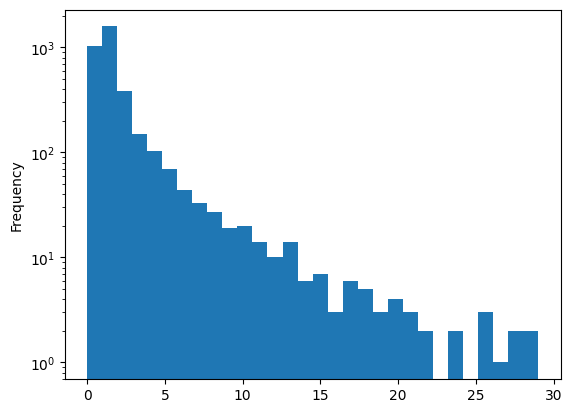

In [53]:
awakeTimes = groupTimes[groupTimes['isSleep'] == 0]
awakeTimes[awakeTimes['duration'] < 30].duration.plot.hist(bins=30, log=True)

<AxesSubplot:ylabel='Frequency'>

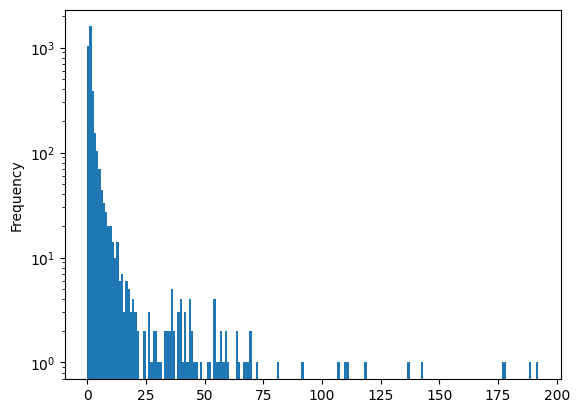

In [68]:
labeledAwakePeriods = hypnoDF[hypnoDF['value'] == 0]
labeledAwakeDuration = (labeledAwakePeriods['endDate'] - labeledAwakePeriods['startDate']).astype('timedelta64[m]')
labeledAwakeDuration[labeledAwakeDuration<1000].plot.hist(bins=200,log=True)

In [ ]:
def graphSomeStages(hypnosDF, timePeriod):
    # hypnosDF is sets of 3 columns in the format <sensorName>_startDate, <sensorName>_endDate, <sensorName>_value

    # we can parse the names from the column names
    deviceNames = set([x.split("_")[0] for x in hypnosDF.columns])

    #time perod

    # for the queried time period 
    # we set up the bounds of the graph
    # we query each set of columns for data during the time
    # if there the start or end time happens in the middle fo a segment query the end time or start time and 
        # graph the modified 
    
    # the actual data to be graphed are 2D line plots of [times], [values]



In [216]:
def graphSleepForDay(day, hypnoDf):
    numDevices = len(hypnoDf.columns) // 3
    deviceNames = [hypnoDf.columns[devicei * 3].split("_")[0] for devicei in range(numDevices)]
    for devicei in range(numDevices):
        deviceName = hypnoDf.columns[devicei * 3].split("_")[0]
        do = .02 * i # device offset

        #generate groupings of the columns
        # query those columns for any group that starts or ends in the desired day 

        og_times = datadf.loc[theDate][deviceNames[i]][0]
        og_stages = datadf.loc[theDate][deviceNames[i]][1]


SyntaxError: unexpected EOF while parsing (1058845238.py, line 4)